# Optimal learning rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from metamod.utils import ResultsManager
from metamod.utils import learning_rate_plot
plt.rcParams['text.usetex'] = True

## Semantic task 

In [2]:
results_path = "../results/sweep_learning_rate_v2/run_id_*_Semantic_*"
# results_path = "../results/corrected_learning_rate/run_id_*_MNIST_*"
path_list = sorted(glob.glob(results_path))

In [5]:
spec_path_list = []
run_ids = np.arange(0, 10)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)

In [6]:
spec_path_list

['../results/sweep_learning_rate_v2/run_id_0_Semantic_15-05-2023_14-39-48-158',
 '../results/sweep_learning_rate_v2/run_id_1_Semantic_15-05-2023_14-42-56-924',
 '../results/sweep_learning_rate_v2/run_id_2_Semantic_15-05-2023_14-39-10-802',
 '../results/sweep_learning_rate_v2/run_id_3_Semantic_15-05-2023_13-09-49-104',
 '../results/sweep_learning_rate_v2/run_id_4_Semantic_15-05-2023_13-11-03-093',
 '../results/sweep_learning_rate_v2/run_id_5_Semantic_15-05-2023_13-07-18-714',
 '../results/sweep_learning_rate_v2/run_id_6_Semantic_15-05-2023_13-08-14-667',
 '../results/sweep_learning_rate_v2/run_id_7_Semantic_15-05-2023_13-08-55-114',
 '../results/sweep_learning_rate_v2/run_id_8_Semantic_15-05-2023_13-07-50-946',
 '../results/sweep_learning_rate_v2/run_id_9_Semantic_15-05-2023_13-07-22-887']

In [32]:
results = ResultsManager(spec_path_list[2], verbose=True)

### Results from ../results/sweep_learning_rate_v2/run_id_2_Semantic_15-05-2023_14-39-10-802 ###
### Param Keys ###
--- dataset_params ---
batch_size, h_levels, dataset
--- model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
--- equation_params ---
in_cov, out_cov, in_out_cov, init_weights, in_cov_test, out_cov_test, in_out_cov_test, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, solver
--- control_params ---
control_lower_bound, control_upper_bound, gamma, cost_coef, reward_convertion, init_opt_lr, cost_offset, control_lr, in_cov, out_cov, in_out_cov, init_weights, in_cov_test, out_cov_test, in_out_cov_test, n_steps, reg_coef, intrinsic_noise, learning_rate, time_constant, iters_control, control
--- reset_model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
### Results Keys ###
dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iters_sim', 'L

In [37]:
results.params["model_params"]["learning_rate"]

0.005

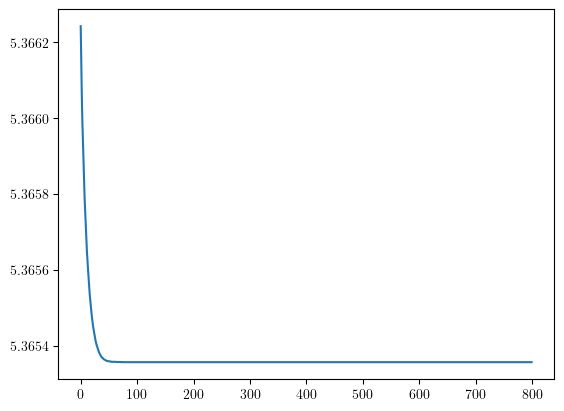

In [34]:
cumulated_reward = results.results["cumulated_reward_opt"]
plt.plot(cumulated_reward)
plt.show()

In [35]:
optimal_learning_rate = results.results["control_signal"].detach().cpu().numpy()

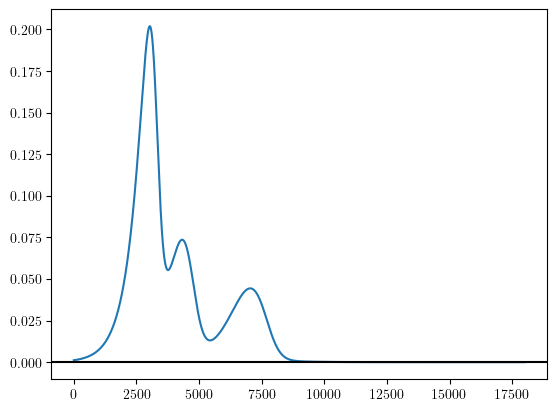

In [36]:
plt.plot(optimal_learning_rate)
plt.axhline(y=0.0, c = "k")
plt.show()